## Blurring, Edge and Sharpening 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy import signal

In [2]:
img = plt.imread('images/bird.png')

In [3]:
imGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [4]:
smoothingMask = np.ones((15,15))/225

In [5]:
imBlurred = signal.convolve2d(imGray,smoothingMask,
                              boundary='symm',mode='same')

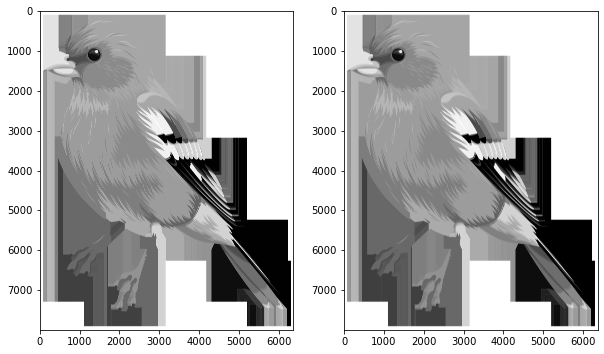

In [6]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,15))
ax1.imshow(imGray,cmap='gray')
ax2.imshow(imBlurred,cmap='gray')

In [7]:
xMask = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
yMask = xMask.T.copy()

In [8]:
fx = signal.convolve2d(imGray,xMask,boundary='symm',mode='same')
fy = signal.convolve2d(imGray,yMask,boundary='symm',mode='same')

In [9]:
fx.shape

(8000, 6368)

In [10]:
imGray.shape

(8000, 6368)

In [12]:
Gm = (fx**2 + fy**2)**0.5

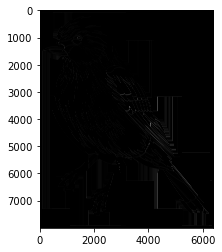

In [13]:
plt.imshow(Gm, cmap='gray')

In [17]:
th = Gm.max() - 4*Gm.std()

In [18]:
th

2.5516147438128147

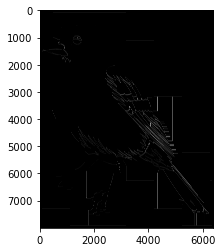

In [21]:
E = Gm>th
plt.imshow(Gm>0.5,cmap='gray')

In [26]:
imSharped = imBlurred + 0.5*Gm

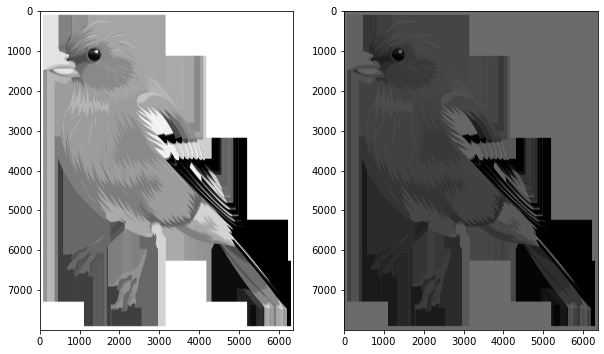

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
ax1.imshow(imBlurred,cmap='gray')
ax2.imshow(imSharped,cmap='gray')